# Exploratory Data Analysis of B-Cell Data

In this notebook we features and structure of B-cell data from the Dana Pe'er Lab of Computational Systems Biology. As part of their experiments, Pe’er et.al collected a B cell centric, mass cytometry dataset from human bone marrow. Their dataset includes records of multiple B cell cellular features, such as activation of regulatory sig-naling molecules, and phenotypic proteins.  We will be using their publicly available data of mass cytometry and scRNA-seq. 

For more information about the Dana Pe'er Lab and their Wanderlust algorithm: https://dpeerlab.github.io/dpeerlab-website/wanderlust.html

Their publicly available B cell data: https://dpeerlab.github.io/dpeerlab-website/wanderlust-data.html

## Analyzing Flow Cytometry Data

In [1]:
# data management
import numpy as np
import pandas as pd

# flow cytometry libraries
import FlowCytometryTools
import FlowCal
import cytoflow as flow

Matplotlib is building the font cache; this may take a moment.


Load in the b-cell data.

In [16]:
marrow_basal_file = '../data/B_cell_data/Marrow1_01_Basal1.fcs'
marrow_bcr_file   = '../data/B_cell_data/Marrow1_06_BCR.fcs'

# using the cytoflow package
basal_tube = flow.Tube(file = marrow_basal_file,
                  conditions = {'bcr' : 0.0})
bcr_tube   = flow.Tube(file=marrow_bcr_file,
                  conditions = {'bcr' : 1.0})

import_op = flow.ImportOp(conditions = {'bcr' : 'float'},
                          tubes = [basal_tube, bcr_tube])


ex = import_op.apply()
print("Channels in this experiment: \n", ex.channels)

Channels in this experiment: 
 ['103-Viability', '110-CD3', '110_114-CD3', '111-CD3', '112-CD3', '114-CD3', '115-CD45', '139-CD45RA', '141-pPLCgamma2', '142-CD19', '144-CD11b', '145-CD4', '146-CD8', '147-CD20', '148-CD34', '150-pSTAT5', '151-pERK1/2', '152-Ki67', '153-pMAPKAPK2', '154-pSHP2', '156-pZAP70/Syk', '158-CD33', '159-pSTAT3', '160-CD123', '164-pSLP-76', '165-pNFkB', '166-IkBalpha', '167-CD38', '168-pH3', '169-pP38', '170-CD90', '171-pBtk/Itk', '172-pS6', '174-pSrcFK', '175-pCrkL', '176-pCREB', '191-DNA', '193-DNA', 'Cell Length', 'EventNum', 'Time']


Plot a channel on a histogram. 

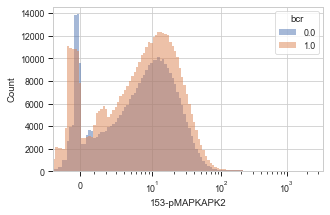

In [25]:
channel = '153-pMAPKAPK2'
hist = flow.HistogramView(channel = channel,
                          scale = 'logicle',
                          huefacet = 'bcr')
hist.plot(ex)